# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [27]:
%matplotlib inline 

import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import pandas as pd    

import matplotlib.pyplot as plt   

import seaborn as sns

from sklearn import metrics

from sklearn import tree

from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [28]:
wine_df = pd.read_csv("winequality-red.csv")


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
print("Shape - ",wine_df.shape)

Shape -  (1599, 12)


In [6]:
print("Attributes - \n")
print(wine_df.info(verbose=True))

Attributes - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


# Q4 Print the descriptive statistics of each & every column using describe() function

In [7]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

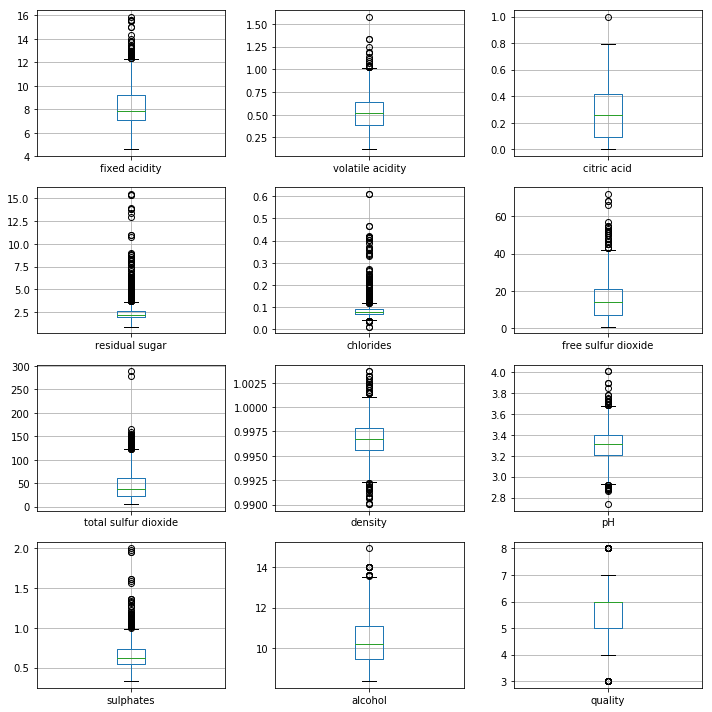

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,3,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(wine_df.columns.values)[:]):
    a = wine_df.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

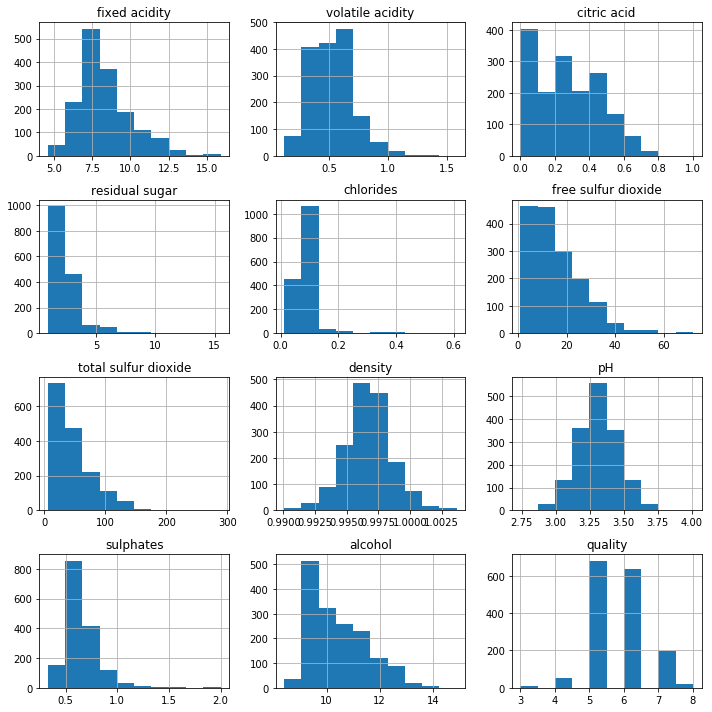

In [9]:
fig, axes = plt.subplots(4,3,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(wine_df.columns.values)[:]):
    a = wine_df.hist(el, ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


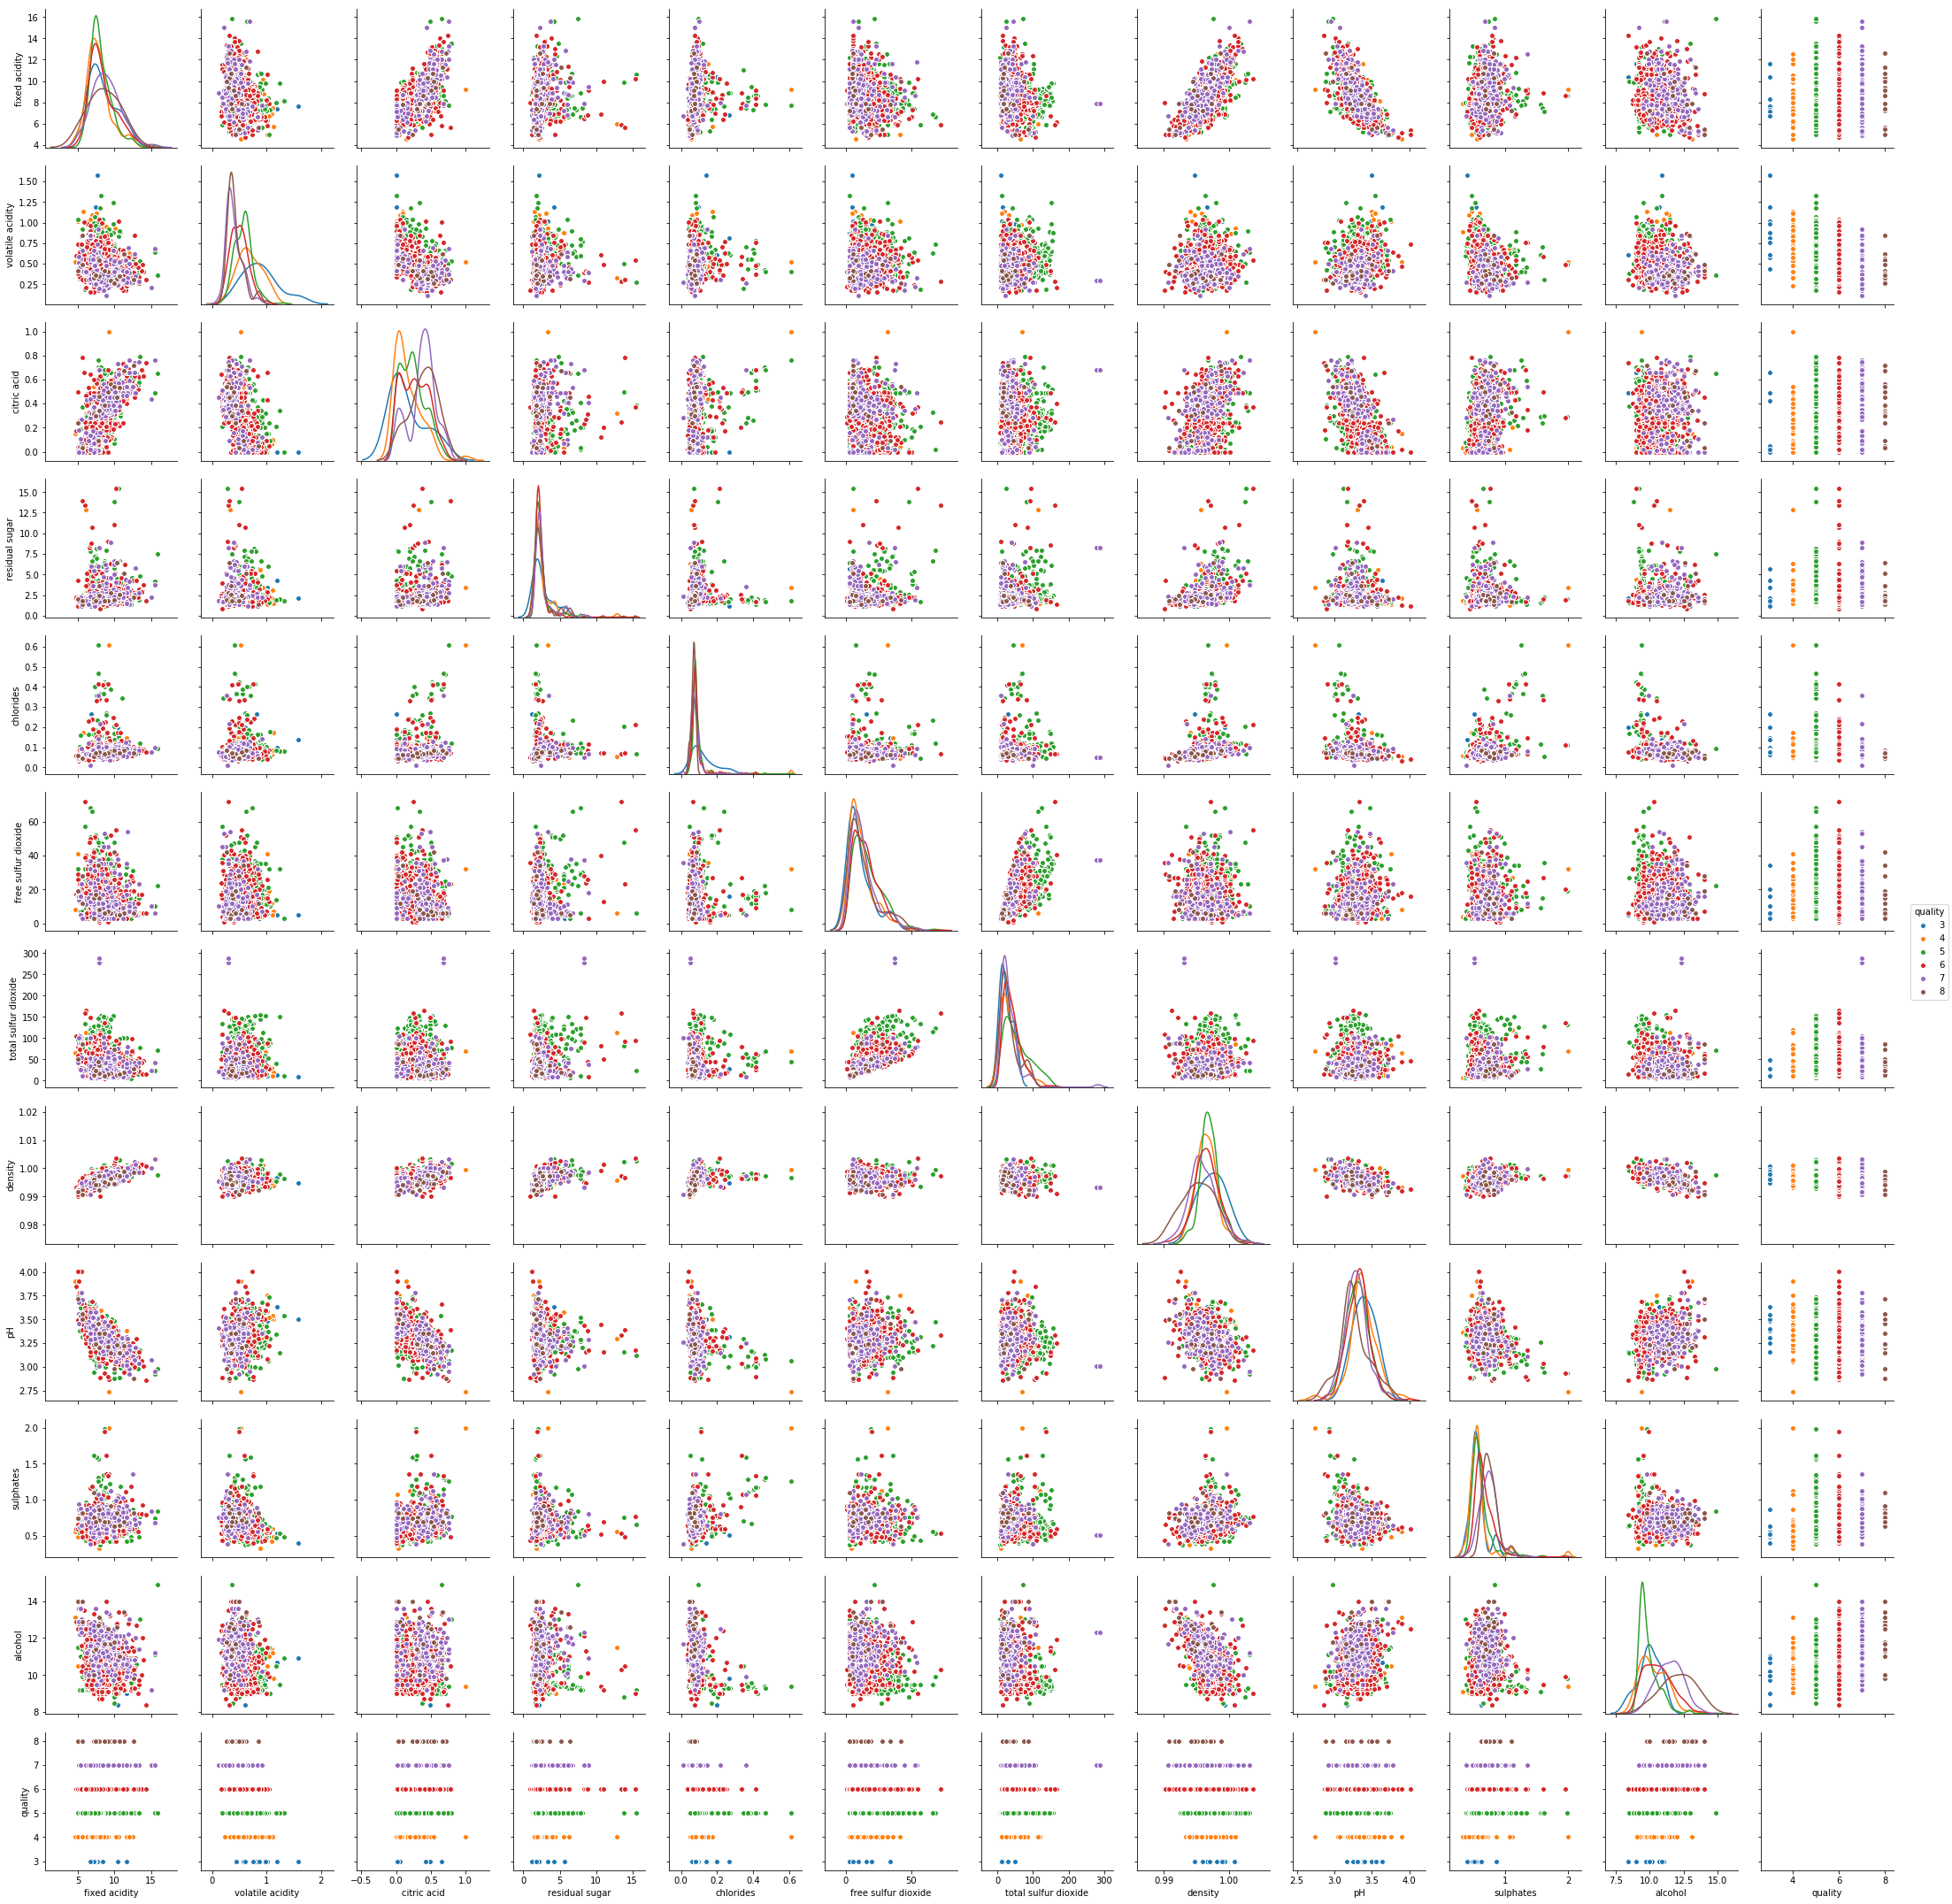

In [10]:
sns.pairplot(wine_df, diag_kind='kde', hue = 'quality')

In [10]:
# Insights from the dataset:
# Correlation with Target variable - Quality:
    # Volatile acidity, chlorides, total sulfur dioxide, density have moderate negative correlation with Quality
    # Residual sugar, pH, free sulfur dioxide have almost no correlation with Quality
    # Remaining parameters have positive correlation with Quality
# pH, density, Chlorides and Sulphates distribution tending close to Normal (however, not perfect normal)
# Density is almost a constant value
# The ratio of quality (Target value) is more in favor of 5 and 6 compared to 4 and 7. 
        # There is unbalanced data and the model's ability to predict quality 5 and 6 will be better / higher than predicting quality of 4 and 7.


# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [11]:
# Removing outliers and assigning it to new dataframe

Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1

wine_df_new = wine_df[~((wine_df < (Q1 - 1.5 * IQR)) |(wine_df > (Q3 + 1.5 * IQR))).any(axis=1)]
wine_df_new.shape

(1179, 12)

In [12]:
wine_df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
X =  wine_df_new.drop("quality", axis=1)
y =  wine_df_new[["quality"]]

print('X.shape - ',X.shape,'\ny.shape - ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X.shape -  (1179, 11) 
y.shape -  (1179, 1)


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [14]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

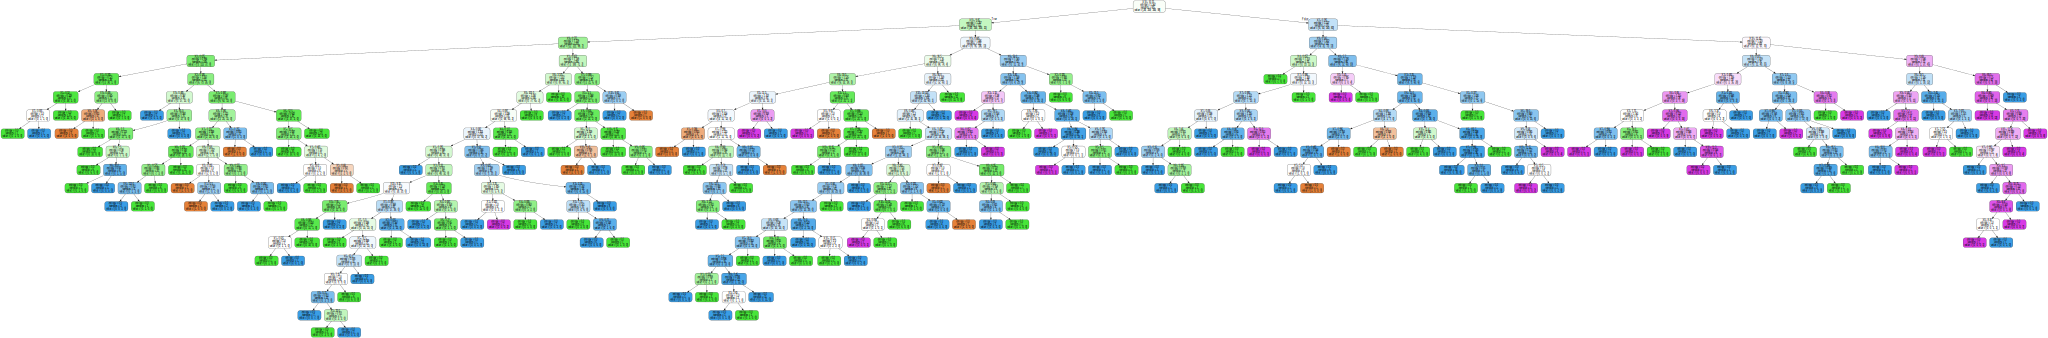

In [16]:
import graphviz 
dot_data = tree.export_graphviz(dt_model,out_file=None,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Q9 Print the accuracy of the model & print the confusion matrix 

In [17]:
y_predict = dt_model.predict(X_test)
print(y_predict)

[5 6 6 5 5 7 7 6 6 5 6 5 6 6 6 5 5 6 5 5 6 5 5 6 5 6 5 5 6 6 5 6 6 6 6 6 6
 7 6 6 5 5 6 5 6 5 6 5 6 5 6 5 4 5 6 5 5 5 5 7 5 5 5 5 5 5 7 6 5 6 5 5 5 5
 6 5 6 7 6 6 5 5 6 5 6 6 5 5 5 6 4 6 7 5 6 6 6 5 5 5 5 5 6 5 6 5 6 6 7 7 5
 5 6 5 5 5 5 5 7 5 6 5 6 6 5 4 5 5 6 5 5 6 5 6 5 6 6 5 6 6 7 5 6 6 5 5 6 6
 7 5 6 6 5 6 6 5 6 5 5 5 7 5 5 6 5 5 5 5 6 6 5 6 6 6 6 7 6 7 6 4 5 6 6 7 6
 5 7 6 5 6 5 5 6 4 5 6 7 6 5 5 6 6 6 7 6 5 5 6 6 5 5 6 5 5 5 5 6 6 6 7 6 5
 5 6 7 6 6 6 6 6 5 5 6 6 7 6 6 5 5 6 6 7 5 5 5 6 6 5 5 5 6 5 5 6 5 6 5 6 6
 6 5 7 5 5 5 6 6 6 7 6 6 5 6 5 6 5 5 5 6 7 6 6 7 6 6 5 6 7 4 6 6 6 5 6 5 5
 6 5 4 6 5 4 5 7 6 6 7 6 6 6 5 6 6 6 5 5 6 6 6 6 5 6 6 5 5 5 6 6 6 6 6 4 5
 5 5 7 6 5 5 6 6 5 6 6 5 5 7 6 5 5 6 6 6 7]


In [18]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 4x4 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_pred_dt_model))

[[  2   5   2   0]
 [  7 103  43   1]
 [  0  33 106  15]
 [  0  10  10  17]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [20]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=100)
dt_model_reg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [21]:
y_predict_reg = dt_model_reg.predict(X_test)
print('Accuracy - ',dt_model_reg.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict_reg))
print(metrics.classification_report(y_test, y_predict_reg))

Accuracy -  0.6299435028248588
[[  0   6   3   0]
 [  0 112  39   3]
 [  0  41  96  17]
 [  0   4  18  15]]
             precision    recall  f1-score   support

          4       0.00      0.00      0.00         9
          5       0.69      0.73      0.71       154
          6       0.62      0.62      0.62       154
          7       0.43      0.41      0.42        37

avg / total       0.61      0.63      0.62       354



# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,random_state=100)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [26]:
print(rfcl.feature_importances_)

[0.07648525 0.09849281 0.0737871  0.06252574 0.08169879 0.06885073
 0.08972765 0.10582071 0.07813712 0.12148836 0.14298573]


In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state=100)
scores = cross_val_score(rfcl,X,y,cv=kfold)
scores.mean()

0.5835868462987108

# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
abcl = AdaBoostClassifier(n_estimators=100,random_state=100)
abcl = abcl.fit(X_train, y_train)
scores = cross_val_score(abcl,X,y,cv=5)
scores.mean()

0.4429406037000974

In [32]:
y_pred_abcl = abcl.predict(X_test)
print("Adaboost Ensemble Technique")
print("Model Accuracy Score: ",abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_pred_abcl))
print(metrics.classification_report(y_test, y_pred_abcl))

Adaboost Ensemble Technique
Model Accuracy Score:  0.4915254237288136
[[ 2  5  1  1]
 [ 7 97 39 11]
 [ 1 42 51 60]
 [ 0  5  8 24]]
             precision    recall  f1-score   support

          4       0.20      0.22      0.21         9
          5       0.65      0.63      0.64       154
          6       0.52      0.33      0.40       154
          7       0.25      0.65      0.36        37

avg / total       0.54      0.49      0.50       354



# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [33]:
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100,random_state=100)
kfold = model_selection.KFold(n_splits=10,random_state =100)
scores = cross_val_score(bgcl,X,y,cv=kfold)
scores.mean()


0.5962624945675793

In [34]:
bgcl = bgcl.fit(X_train, y_train)
y_pred_bgcl = bgcl.predict(X_test)
print("Bagging Ensemble Technique")
print("Model Accuracy Score: ",bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_pred_bgcl))
print(metrics.classification_report(y_test, y_pred_bgcl))

Bagging Ensemble Technique
Model Accuracy Score:  0.7146892655367232
[[  0   6   3   0]
 [  0 120  31   3]
 [  0  29 115  10]
 [  0   4  15  18]]
             precision    recall  f1-score   support

          4       0.00      0.00      0.00         9
          5       0.75      0.78      0.77       154
          6       0.70      0.75      0.72       154
          7       0.58      0.49      0.53        37

avg / total       0.69      0.71      0.70       354



# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [35]:
kfold = model_selection.KFold(n_splits=10,random_state =100)
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=100)
results = model_selection.cross_val_score(gbcl,X,y,cv=kfold)
print(results.mean())


0.5605751122700275


In [36]:
gbcl = gbcl.fit(X_train, y_train)
y_pred_gbcl = gbcl.predict(X_test)
print("Gradient Boost Ensemble Technique")
print("Model Accuracy Score: ",gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_pred_gbcl))
print(metrics.classification_report(y_test, y_pred_gbcl))

Gradient Boost Ensemble Technique
Model Accuracy Score:  0.7090395480225988
[[  1   5   3   0]
 [  0 120  31   3]
 [  1  30 114   9]
 [  0   5  16  16]]
             precision    recall  f1-score   support

          4       0.50      0.11      0.18         9
          5       0.75      0.78      0.76       154
          6       0.70      0.74      0.72       154
          7       0.57      0.43      0.49        37

avg / total       0.70      0.71      0.70       354



# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [37]:
estimators = []
estimators.append(("Decision trees",dt_model))
estimators.append(("Random Forest",rfcl))
estimators.append(("Ada Boost",abcl))
estimators.append(("Bagging",bgcl))
estimators.append(("Gradient Boost",gbcl))
kfold = model_selection.KFold(n_splits=10,random_state =100)
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble,X,y,cv=kfold)
print(results.mean())

0.5954222801680429


In [38]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('Decision trees', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weigh...       presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [39]:
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Technique")
print("Model Accuracy Score: ",ensemble.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_pred_ensemble))
print(metrics.classification_report(y_test, y_pred_ensemble))

Ensemble Technique
Model Accuracy Score:  0.7372881355932204
[[  1   5   3   0]
 [  0 125  27   2]
 [  0  27 117  10]
 [  0   6  13  18]]
             precision    recall  f1-score   support

          4       1.00      0.11      0.20         9
          5       0.77      0.81      0.79       154
          6       0.73      0.76      0.75       154
          7       0.60      0.49      0.54        37

avg / total       0.74      0.74      0.73       354

